In [4]:
import pandas as pd
import math
import scipy.stats
import seaborn as sns
import statistics
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [5]:
df1 = pd.read_csv("income_train.csv")
df1.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
df1.shape

(9557, 143)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


### **Data types  are mix of float, int and object. Output variable is "Target"

In [8]:
df1.isnull().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

### Above values shows null values in existing columns

In [9]:
df1['parentesco1'].isnull().sum()

0

In [10]:
df1.groupby('parentesco1')['parentesco1'].agg('count')

parentesco1
0    6584
1    2973
Name: parentesco1, dtype: int64

### **Therefore count for '0' i.e. 6584 household are without family head

In [11]:
#Dropping insignificant variable ids
df2 = df1.drop([('Id'),('v18q1'),('idhogar')], axis = 'columns')
df2.head()


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,NaN,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


### Droppping insignificant columns

In [12]:
#Dropping mix variable categories edjefe, edjefa, dependency
df3 = df2.drop([('dependency'),('edjefe'),('edjefa')], axis = 'columns')
df3.head()


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,NaN,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


## Replacing missing values in v2a1 with Median

In [13]:
# Replacing missing values in v2a1 with median

median_v2a1=math.floor(df3.v2a1.median())
median_v2a1

130000

In [14]:
df3.v2a1 = df3.v2a1.fillna(median_v2a1)
df3

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,135000.0,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,130000.0,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,180000.0,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,180000.0,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,0,2,2,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,80000.0,0,6,0,1,1,0,0,2,2,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,80000.0,0,6,0,1,1,0,0,2,2,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,80000.0,0,6,0,1,1,0,0,2,2,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [15]:
df3.isnull().sum()

v2a1               0
hacdor             0
rooms              0
hacapo             0
v14a               0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          5
agesq              0
Target             0
Length: 137, dtype: int64

In [16]:
# Replacing missing values in SQBmeaned  with missing values

median_SQBmeaned =math.floor(df3.SQBmeaned.median())
median_SQBmeaned

81

In [17]:
df3.SQBmeaned = df3.SQBmeaned.fillna(median_SQBmeaned)
df3

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,135000.0,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,130000.0,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,180000.0,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,180000.0,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,0,2,2,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,80000.0,0,6,0,1,1,0,0,2,2,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,80000.0,0,6,0,1,1,0,0,2,2,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,80000.0,0,6,0,1,1,0,0,2,2,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [18]:
df3.isnull().sum()

v2a1               0
hacdor             0
rooms              0
hacapo             0
v14a               0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Target             0
Length: 137, dtype: int64

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 137 entries, v2a1 to Target
dtypes: float64(7), int64(130)
memory usage: 10.0 MB


In [20]:
#Find columns with null values
null_counts=df3.select_dtypes('int64').isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [21]:
df3.select_dtypes('float64').head()

,v2a1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,130000.0,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [22]:
#Find columns with null values
null_counts=df3.select_dtypes('float64').isnull().sum()
null_counts[null_counts > 0]

rez_esc     7928
meaneduc       5
dtype: int64

In [23]:
#Find columns with null values
null_counts=df3.select_dtypes('float32').isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: float64)

In [24]:
df3.select_dtypes('object').head()

""
0
1
2
3
4


In [25]:
#Find columns with null values
null_counts=df3.select_dtypes('object').isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: float64)

In [26]:
df3[('v2a1')].isnull().sum()

0

In [27]:
# skewness
df3.skew().sort_values(ascending=False)

planpri            56.423987
pisoother          32.545696
pisonatur          30.870701
elimbasu6          28.172097
paredfibras        26.074082
                     ...    
refrig             -4.544036
abastaguadentro    -5.040196
techozinc          -5.518740
mobilephone        -6.126407
v14a              -13.718759
Length: 137, dtype: float64

In [28]:
### Few biases in dataset due to higher skewness

C:\Users\rtriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rtriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


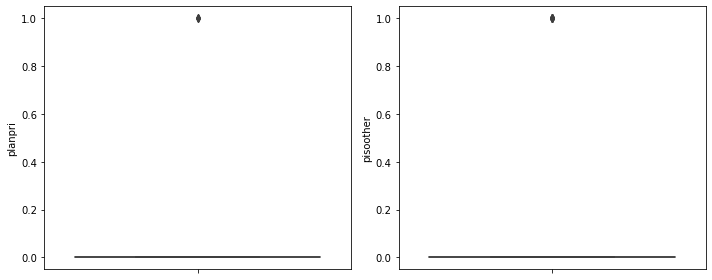

C:\Users\rtriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rtriv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


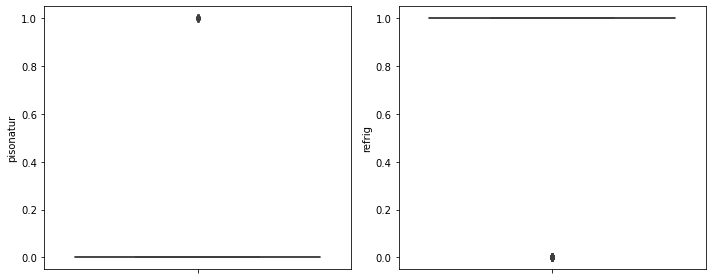

In [29]:
num_cols = ['planpri', 'pisoother', 'pisonatur', 'refrig']

facet = None

for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(facet, num_cols[i],data = df3)
        plt.subplot(122)            
        sns.boxplot(facet, num_cols[i+1],data = df3)
        plt.tight_layout()
        plt.show()

In [30]:
df3.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 137 entries, v2a1 to Target
dtypes: float64(7), int64(130)
memory usage: 10.0 MB


In [31]:
df3.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9.557000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,1.399424e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,0.385895,1.559171,1.945066,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.577572,1643.774302,3.302292
std,8.147427e+04,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.680779,1.036574,1.188852,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.493725,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,1.300000e+05,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,1.300000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,5.000000,8.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [32]:
#Dropping mix variable categories edjefe, edjefa, dependency
df4 = df3.drop([('rez_esc'),('meaneduc')], axis = 'columns')
df4.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,130000.0,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [33]:
#df5 = df3[['rez_esc','meaneduc','hacdor','rooms','hacapo','Target']]
#df5.head()

In [34]:
#Find columns with null values
null_counts=df4.select_dtypes('float64').isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [35]:
#Find columns with null values
null_counts=df4.select_dtypes('float32').isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: float64)

In [36]:
null_counts=df4.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

# CREATING MACHINE LEARNING MODELS

In [37]:
# CREATING MACHINE LEARNING MODELS

X = df4.drop('Target', axis='columns')
X.head(2)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,190000.0,0,3,0,1,1,0,0,1,1,...,43,100,1849,1,100,0,1.0,0.0,100.0,1849
1,135000.0,0,4,0,1,1,1,0,1,1,...,67,144,4489,1,144,0,1.0,64.0,144.0,4489


In [38]:
y = df4.Target
y.head()

0    4
1    4
2    4
3    4
4    4
Name: Target, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [40]:
# Random Forrest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=60)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=60)

In [41]:
model.score(X_test, y_test)

0.9074267782426778

### cross validation function

In [42]:
# Creating shuffle split to Randomise the variables for cross validation method
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestClassifier(), X, y, cv=cv)

array([0.90794979, 0.90742678, 0.9042887 , 0.91317992, 0.89905858])

## The model works well with Random Forest since the accuracy > 90% with cross validation method

In [43]:
# Confusion Matrix - plots truth on 'y' axis and confusion on 'x' axis
y_predicted = model.predict(X_test)

In [44]:
# First supply 'truth' and then supply 'prediction'

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 117,    5,    0,   34],
       [   3,  243,    6,   55],
       [   1,   14,  170,   49],
       [   0,    6,    4, 1205]], dtype=int64)

In [45]:
# code for confusion matrix visualization - heatmap

#import seaborn as sn
#plt.figure(figsize = (10,7))
#sn.heatmap(cm, annot=True)
#plt.xlabel('Predicted')
#plt.ylabel('Truth')

## Shwoing plot of 'v2a1' and 'age' with respect to 'Target'

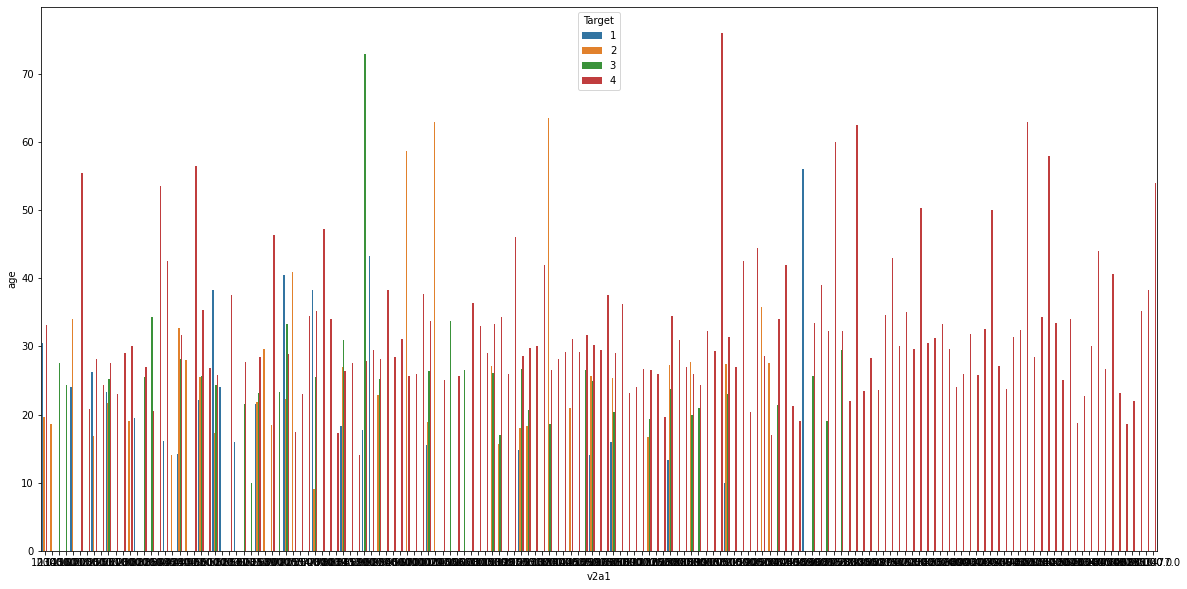

In [46]:
ax = sns.barplot(x= 'v2a1', y='age', data = df1, ci=None, hue = 'Target')